<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [6]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/game-of-thrones
# download the dataset using wget
!wget --directory-prefix ./datasets/game-of-thrones http://dynamics.cs.washington.edu/nobackup/reddit/HBOGameofThrones.tar.gz
!tar -xvf ./datasets/game-of-thrones/HBOGameofThrones.tar.gz -C ./datasets/game-of-thrones/
! ls -l ./datasets/game-of-thrones

Streaming output truncated to the last 5000 lines.
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_97a6a94c9f6df074.frame_idx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_1105fe3ecd7cda50.sidx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_11a0fb4b6dfe79ed.0000
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_4120cccc459af3.sidx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_29d9152d4537b0f.frame_idx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_742fbd90c68cb306.sidx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_1277aff2ce4f24b9.0000
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_473d7597c8c363.0000
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_29d9152d4537b0f.sidx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_a7902982d701a9ca.frame_idx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_87388267916568b5.sidx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_cf7808ddc146e5be.frame_idx
./HBOGameofThrones.2012-04-28.2015-04-25.sgraph/m_6719a83b7c0566c8.fram

In [2]:
! pip install turicreate

     |████████████████████████████████| 91.8MB 95kB/s 
     |████████████████████████████████| 3.4MB 43.9MB/s 
     |████████████████████████████████| 86.3MB 47kB/s 
     |████████████████████████████████| 327kB 39.6MB/s 
     |████████████████████████████████| 3.8MB 38.8MB/s 
     |████████████████████████████████| 450kB 41.0MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=bd1cf24d860f312ceda717083109a904e7e76fcf118471c9b138a11afd8078df
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8d91f9a6e4579f25a60939b9dc656cbb07d92ea37dbbfa365f093f49ac03e135
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
 

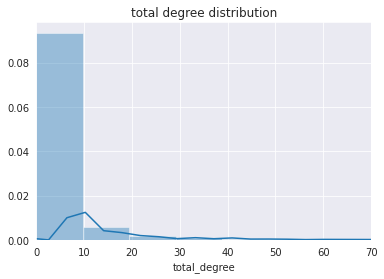

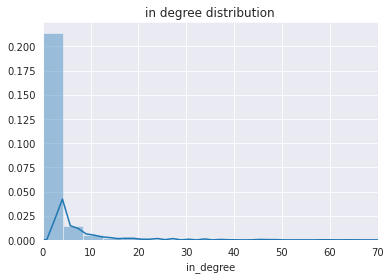

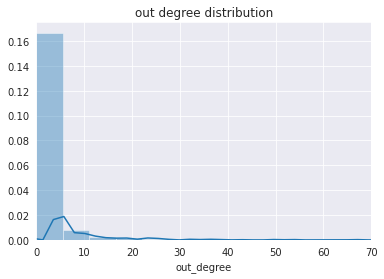

In [7]:
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns

GRAPH_DIR_NAME = "HBOGameofThrones.2012-04-28.2016-10-31.sgraph"
GRAPH_PATH = f"./datasets/game-of-thrones/{GRAPH_DIR_NAME}"

sg = tc.load_sgraph(GRAPH_PATH)
degree = tc.degree_counting.create(sg)


sns.set_style("darkgrid")

# total degree
fig, ax = plt.subplots()
sns.distplot(degree['graph'].vertices['total_degree'], axlabel="total_degree",  ax=ax)
ax.set_xlim(0,70)
ax.set_title("total degree distribution")

# in degree
fig, ax = plt.subplots()
sns.distplot(degree['graph'].vertices['in_degree'], axlabel="in_degree",  ax=ax)
ax.set_xlim(0,70)
ax.set_title("in degree distribution")

# out degree
fig, ax = plt.subplots()
sns.distplot(degree['graph'].vertices['out_degree'], axlabel="out_degree",  ax=ax)
ax.set_xlim(0,70)
ax.set_title("out degree distribution")
plt.show()

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [0]:
import networkx as nx

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

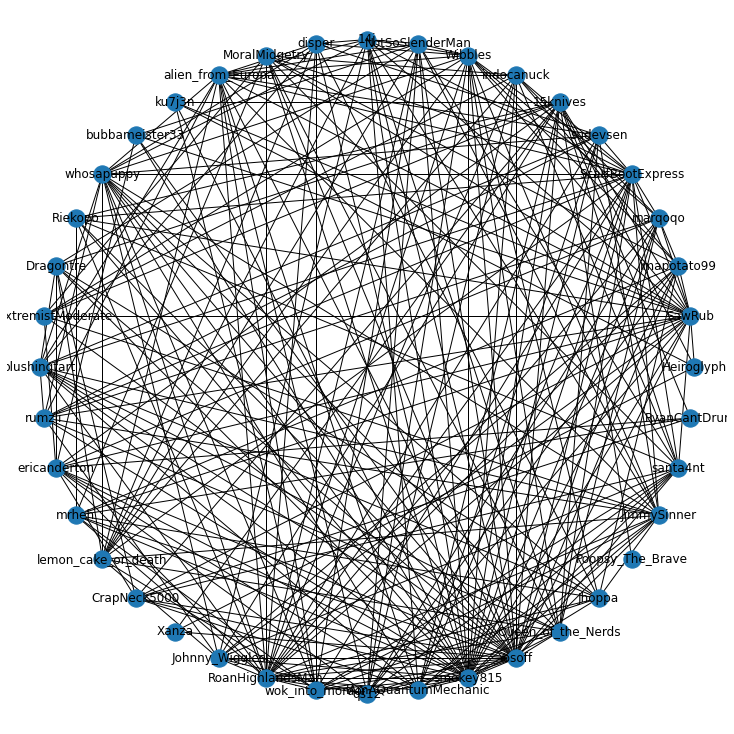

In [10]:
ng = sgraph2nxgraph(sg, False, False, False)

# according to PageRank who is the top 40 users:
pr = nx.pagerank(ng)
pr_top40 = sorted(pr, key=pr.get, reverse=True)[:40]

plt.figure(figsize=(10,10))
h = ng.subgraph(pr_top40)
nx.draw_circular(h, with_labels=True)

**Task 3:** Calculate the degree, triangles, and average shortest path of each vertex in the graph (15pt)

In [11]:
ng_degree = ng.degree()

node_average_shortest_path_dict = {}

def get_average_shortest_path():
    # since the graph is not connected, we will calculate the average shortest path
    # for each node in its component.
    # then each node will be mapped to it's average shortest path
    # in a dict in order to save computing time
    for C in (ng.subgraph(c).copy() for c in nx.connected_components(ng)):
            asp = nx.average_shortest_path_length(C)
            for node in C:
                node_average_shortest_path_dict[node] = asp

get_average_shortest_path()

for node in ng.nodes:
    node_degree = ng_degree[str(node)]
    node_triangles = nx.triangles(ng, [node])
    node_asp = node_average_shortest_path_dict[node]
    print("-"*40)
    print(f"node={node}")
    print(f"degree={node_degree}")
    print(f"triangles={node_triangles}")
    print(f"average shortest path={node_asp}")

Streaming output truncated to the last 5000 lines.
node=sacarn
degree=2
triangles={'sacarn': 1}
average shortest path=4.221030253017609
----------------------------------------
node=Snolarin
degree=1
triangles={'Snolarin': 0}
average shortest path=4.221030253017609
----------------------------------------
node=Rusty_the_Scoob
degree=2
triangles={'Rusty_the_Scoob': 0}
average shortest path=4.221030253017609
----------------------------------------
node=iliekmudkipz
degree=0
triangles={'iliekmudkipz': 0}
average shortest path=0
----------------------------------------
node=toph1980
degree=6
triangles={'toph1980': 2}
average shortest path=4.221030253017609
----------------------------------------
node=314R8
degree=0
triangles={'314R8': 0}
average shortest path=0
----------------------------------------
node=rubywings
degree=2
triangles={'rubywings': 0}
average shortest path=4.221030253017609
----------------------------------------
node=jaxspider
degree=4
triangles={'jaxspider': 1}
averag

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [0]:
# save as a gml file
nx.write_gml(ng, "./datasets/got.gml")

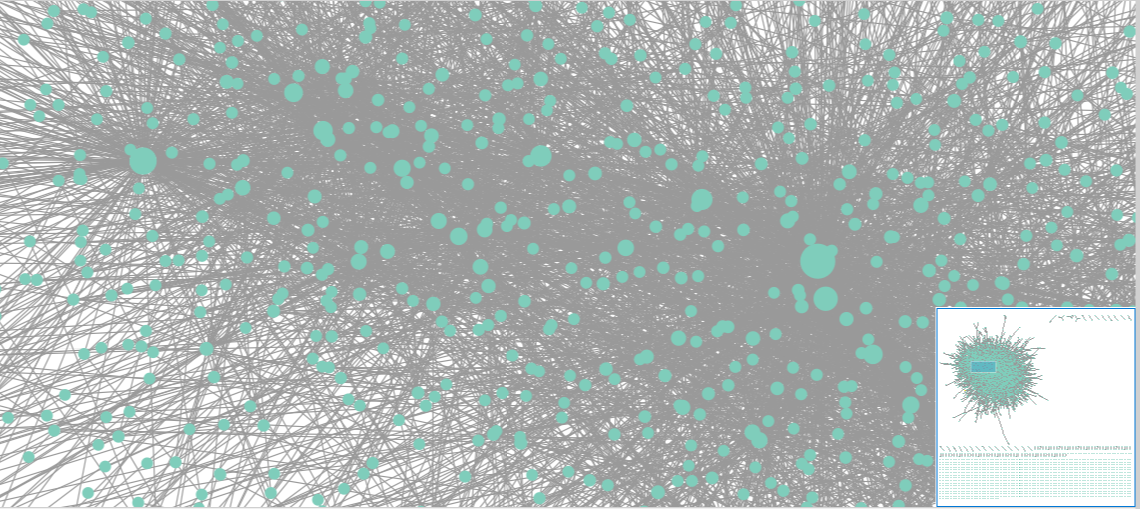

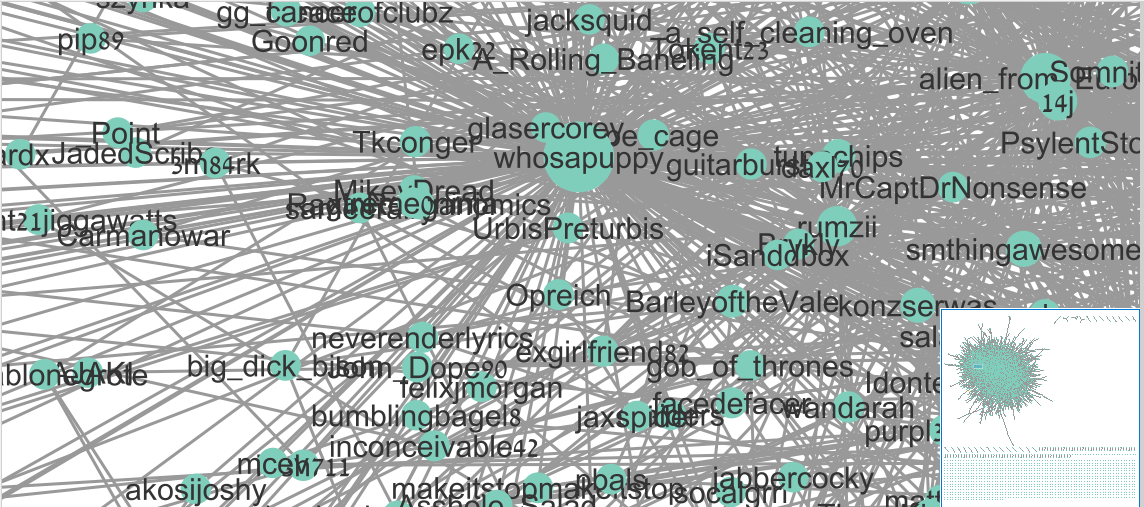

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of edges in the subgraph (5pt)

number of edges in subgraph: 613


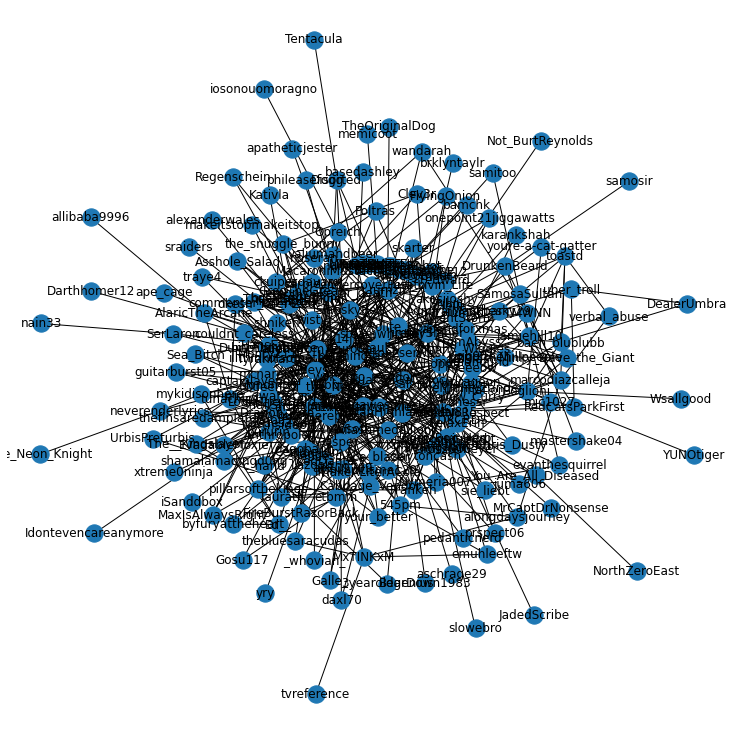

In [15]:
def create_neighbors_subgraph(node):
    neighbors = ng.neighbors(node)
    sub = ng.subgraph(neighbors)
    # drawing
    plt.figure(figsize=(10,10))
    nx.draw_kamada_kawai(sub, with_labels=True)
    print(f"number of edges in subgraph: {sub.number_of_edges()}")

create_neighbors_subgraph("whosapuppy")

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges